[Reference](https://moez-62905.medium.com/simplify-mlops-with-pycaret-mlflow-and-dagshub-366c768f0dac)

In [1]:
# import libraries
import pandas as pd
import numpy as np
# read csv data
data = pd.read_csv('https://raw.githubusercontent.com/srees1988/predict-churn-py/main/customer_churn_data.csv')

# Exploratory Data Analysis (EDA)


In [2]:
# check the data types
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [3]:
# replace blanks with np.nan
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan).astype('float64')
# check dtypes after the fix
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [4]:
# check missing values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

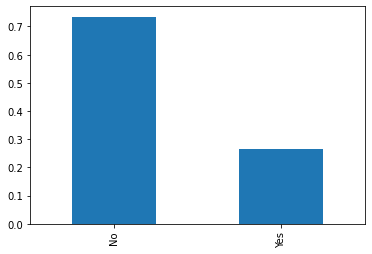

In [5]:
# check the target balance
data['Churn'].value_counts(normalize = True).plot.bar()

# Model Training and Selection


In [6]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# initialize setup
from pycaret.classification import *
s = setup(data, target = 'Churn', session_id = 123, ignore_features = ['customerID'], log_experiment = True, experiment_name = 'churn1')

,Description,Value
0,session_id,123
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7043, 21)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
2022/12/13 13:28:29 INFO mlflow.tracking.fluent: Experiment with name 'churn1' does not exist. Creating a new experiment.
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['customerID'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Churn',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_num

In [8]:
# compare models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8067,0.8479,0.5254,0.6617,0.5849,0.4612,0.4669,0.451
ridge,Ridge Classifier,0.8063,0.0000,0.5097,0.6657,0.5767,0.4541,0.4613,0.023
gbc,Gradient Boosting Classifier,0.8041,0.8471,0.5105,0.6590,0.5744,0.4499,0.4567,1.254
lr,Logistic Regression,0.8022,0.8439,0.5371,0.6424,0.5843,0.4561,0.4597,0.468
lightgbm,Light Gradient Boosting Machine,0.8010,0.8371,0.5246,0.6441,0.5778,0.4494,0.4538,0.188
lda,Linear Discriminant Analysis,0.8008,0.8375,0.5480,0.6349,0.5876,0.4574,0.4599,0.057
rf,Random Forest Classifier,0.7890,0.8181,0.4668,0.6266,0.5345,0.4019,0.4095,0.917
knn,K Neighbors Classifier,0.7724,0.7554,0.4464,0.5814,0.5045,0.3601,0.3658,0.059
et,Extra Trees Classifier,0.7704,0.7847,0.4597,0.5728,0.5092,0.3619,0.3661,0.535
nb,Naive Bayes,0.7454,0.8305,0.7670,0.5067,0.6099,0.4326,0.4534,0.018


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)
INFO:logs:compare_models() succesfully completed......................................


In [9]:
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)


In [10]:
# save pipeline
save_model(best_model, 'my_first_pipeline')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123), model_name=my_first_pipeline, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['customerID'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Churn',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nu...
          

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['customerID'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                 ('dummy', Dummify(target='Churn')),
                 ('fix_perfect', Remove_100(target='Churn')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi',

In [11]:
# load pipeline from file
my_pipeline = load_model('my_first_pipeline')
# sklearn settings to render diagram
from sklearn import set_config
set_config(display = 'diagram')
# display pipeline
print(my_pipeline)

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=my_first_pipeline, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['customerID'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Churn',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                nu...
                ('dummy', Dummify(target='Churn')),
                ('fix_perfect', Remove_100(target='Churn')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_se

In [12]:
# start the mlflow ui
!mlflow ui

[2022-12-13 13:29:23 +0000] [1146] [INFO] Starting gunicorn 20.1.0
[2022-12-13 13:29:23 +0000] [1146] [INFO] Listening at: http://127.0.0.1:5000 (1146)
[2022-12-13 13:29:23 +0000] [1146] [INFO] Using worker: sync
[2022-12-13 13:29:23 +0000] [1148] [INFO] Booting worker with pid: 1148
[2022-12-13 13:29:23 +0000] [1149] [INFO] Booting worker with pid: 1149
[2022-12-13 13:29:23 +0000] [1150] [INFO] Booting worker with pid: 1150
[2022-12-13 13:29:23 +0000] [1151] [INFO] Booting worker with pid: 1151
[2022-12-13 13:29:29 +0000] [1146] [INFO] Handling signal: int

Aborted!
[2022-12-13 13:29:29 +0000] [1151] [INFO] Worker exiting (pid: 1151)
[2022-12-13 13:29:29 +0000] [1149] [INFO] Worker exiting (pid: 1149)
[2022-12-13 13:29:29 +0000] [1148] [INFO] Worker exiting (pid: 1148)
[2022-12-13 13:29:29 +0000] [1150] [INFO] Worker exiting (pid: 1150)
[2022-12-13 13:29:30 +0000] [1146] [INFO] Shutting down: Master


In [ ]:
# # read and write raw data
# import pandas as pd
# data = pd.read_csv('https://raw.githubusercontent.com/srees1988/predict-churn-py/main/customer_churn_data.csv')
# data.to_csv('./data/raw_data.csv')
# # replace blanks with np.nan
# import numpy as np
# data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan).astype('float64')
# # write final data
# data.to_csv('./data/final_data.csv')

# # init dvc repo
# dvc init
# # remote add origin
# dvc remote add origin https://dagshub.com/moez.ali/customer_churn.dvc
# # authenticate dvc
# dvc remote modify origin --local auth basic 
# dvc remote modify origin --local user moez.ali 
# dvc remote modify origin --local password YOUR_TOKEN_WILL_BE_HERE

# dvc add data
# git commit -m "added data folder to dvc"
# git push
# dvc push -r origin

# # set env variables
# import os
# os.environ['MLFLOW_TRACKING_USERNAME'] = 'USERNAME'
# os.environ['MLFLOW_TRACKING_PASSWORD'] = 'PASSWORD'
# os.environ['MLFLOW_TRACKING_URI'] = 'https://dagshub.com/moez.ali/customer_churn.mlflow'
# os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"
# # set mlflow tracking uri
# import mlflow
# mlflow.set_tracking_uri("https://dagshub.com/moez.ali/customer_churn.mlflow")
# # read final_data
# import pandas as pd
# data = pd.read_csv('./data/final_data.csv')
# data.head()
# # init setup
# # initialize setup
# from pycaret.classification import *
# s = setup(data, target = 'Churn', session_id = 123, ignore_features = ['customerID'], log_experiment = True, experiment_name = 'churn1')
# # model training and selection
# best = compare_models()